# Решение задачи классификации: превышает ли значение SI медианное значение выборки

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('Данные_для_курсовои_Классическое_МО.xlsx', index_col=0)
df.head()

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,...,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,340.300,384.350449,158,0,0.038844,-0.293526,0.293526,0.038844,0.642857,1.035714,1.321429,14.822266,9.700470,2.600532,-2.343082,2.644698,-2.322229,5.944519,0.193481,3.150503,1.164038,611.920301,20.208896,19.534409,19.534409,13.127794,12.204226,12.204226,12.058078,12.058078,10.695991,10.695991,7.340247,7.340247,-0.66,2.187750e+06,20.606247,6.947534,2.868737,173.630124,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,340.300,388.381750,162,0,0.012887,-0.313407,0.313407,0.012887,0.607143,1.000000,1.285714,14.975110,9.689226,2.614066,-2.394690,2.658342,-2.444817,5.134527,0.120322,3.150503,1.080362,516.780124,20.208896,19.794682,19.794682,13.127794,12.595754,12.595754,12.648545,12.648545,11.473090,11.473090,8.180905,8.180905,-0.08,2.187750e+06,21.163454,7.257648,3.027177,174.939204,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,388.344,446.458903,186,0,0.094802,-0.325573,0.325573,0.094802,0.562500,0.906250,1.156250,15.353938,9.681293,2.665274,-2.477203,2.679014,-2.565224,5.117187,-0.922902,3.214947,1.219066,643.620154,23.794682,23.689110,23.689110,14.595754,14.249005,14.249005,15.671216,15.671216,13.402236,13.402236,10.140303,10.140303,-0.08,8.610751e+06,25.026112,7.709373,3.470070,201.238858,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,3,0
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,352.311,398.366099,164,0,0.038844,-0.293526,0.293526,0.038844,0.620690,1.000000,1.310345,14.821216,9.700497,2.600529,-2.342885,2.644709,-2.322030,5.944502,0.193510,3.179270,1.120513,626.651366,20.916003,20.241516,20.241516,13.627794,12.704226,12.704226,12.411631,12.411631,10.945991,10.945991,7.517023,7.517023,-0.66,3.572142e+06,21.567454,7.485204,3.263848,179.995066,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0
4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,424.377,466.334799,184,0,0.062897,-0.257239,0.257239,0.062897,0.600000,0.971429,1.257143,14.831112,9.700386,2.602486,-2.342009,2.648473,-2.318893,5.963448,0.193687,3.337074,1.136678,1101.164252,24.639617,22.617677,22.617677,16.526773,13.868825,13.868825,13.613700,13.613700,11.833480,11.833480,8.119076,8.119076,-2.22,1.053758e+08,23.194917,7.639211,3.345855,211.919602,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
# подготовка данных
mediana = df['SI'].median()
print(f"Медиана SI: {mediana:.4f}")

X = df.drop(['IC50, mM', 'CC50, mM', 'SI'], axis=1)
# констатные признаки
const_features = [col for col in df.columns if df[col].std() == 0]
X = X.drop(const_features, axis=1)
# Пропуски заполняем медианой
X = X.fillna(X.median())

# Бинарная классификация: 0 - SI ≤ медианы, 1 - SI > медианы
y = (df['SI'] > mediana).astype(int)

Медиана SI: 3.8462


In [ ]:
X

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,...,fr_Nhpyrrole,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azo,fr_benzene,fr_bicyclic,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_ketone,fr_ketone_Topliss,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,340.300,384.350449,158,0.038844,-0.293526,0.293526,0.038844,0.642857,1.035714,1.321429,14.822266,9.700470,2.600532,-2.343082,2.644698,-2.322229,5.944519,0.193481,3.150503,1.164038,611.920301,20.208896,19.534409,19.534409,13.127794,12.204226,12.204226,12.058078,12.058078,10.695991,10.695991,7.340247,7.340247,-0.66,2.187750e+06,20.606247,6.947534,2.868737,173.630124,0.000000,0.000000,0.0,0.00000,...,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
1,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,340.300,388.381750,162,0.012887,-0.313407,0.313407,0.012887,0.607143,1.000000,1.285714,14.975110,9.689226,2.614066,-2.394690,2.658342,-2.444817,5.134527,0.120322,3.150503,1.080362,516.780124,20.208896,19.794682,19.794682,13.127794,12.595754,12.595754,12.648545,12.648545,11.473090,11.473090,8.180905,8.180905,-0.08,2.187750e+06,21.163454,7.257648,3.027177,174.939204,10.633577,0.000000,0.0,0.00000,...,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
2,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,388.344,446.458903,186,0.094802,-0.325573,0.325573,0.094802,0.562500,0.906250,1.156250,15.353938,9.681293,2.665274,-2.477203,2.679014,-2.565224,5.117187,-0.922902,3.214947,1.219066,643.620154,23.794682,23.689110,23.689110,14.595754,14.249005,14.249005,15.671216,15.671216,13.402236,13.402236,10.140303,10.140303,-0.08,8.610751e+06,25.026112,7.709373,3.470070,201.238858,8.966062,0.000000,0.0,0.00000,...,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,3,0
3,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,352.311,398.366099,164,0.038844,-0.293526,0.293526,0.038844,0.620690,1.000000,1.310345,14.821216,9.700497,2.600529,-2.342885,2.644709,-2.322030,5.944502,0.193510,3.179270,1.120513,626.651366,20.916003,20.241516,20.241516,13.627794,12.704226,12.704226,12.411631,12.411631,10.945991,10.945991,7.517023,7.517023,-0.66,3.572142e+06,21.567454,7.485204,3.263848,179.995066,0.000000,0.000000,0.0,0.00000,...,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0
4,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,424.377,466.334799,184,0.062897,-0.257239,0.257239,0.062897,0.600000,0.971429,1.257143,14.831112,9.700386,2.602486,-2.342009,2.648473,-2.318893,5.963448,0.193687,3.337074,1.136678,1101.164252,24.639617,22.617677,22.617677,16.526773,13.868825,13.868825,13.613700,13.613700,11.833480,11.833480,8.119076,8.119076,-2.22,1.053758e+08,23.194917,7.639211,3.345855,211.919602,0.000000,0.000000,0.0,0.00000,...,0,0,0,0,0,0,0,0,0,0,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
y

,SI
0,1
1,1
2,0
3,1
4,0
...,...
996,0
997,0
998,0
999,0


In [ ]:
# Разделение на выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размеры")
print(f"обучающая выборка: {X_train.shape}")
print(f"тестовая выборка: {X_test.shape}")

Размеры
обучающая выборка: (800, 192)
тестовая выборка: (201, 192)


In [ ]:
# Выводим распределение классов
y_train.value_counts(normalize=True)

,proportion
SI,
1,0.50875
0,0.49125


Примерно поровну, значит нет проблемы дисбаланса классов

In [ ]:
models = [
    ('Logistic Regression', LogisticRegression(random_state=42, max_iter=1000)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('LightGBM', LGBMClassifier(random_state=42))
]

In [ ]:
results = []  # Будет содержать словари с метриками для каждой модели
names = []

for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # accuracy
    accuracy_scores = cross_val_score(pipeline, X_train, y_train, cv=3,
                                      scoring='accuracy', n_jobs=-1)

    # f1-score
    f1_scores = cross_val_score(pipeline, X_train, y_train, cv=3,
                                scoring='f1', n_jobs=-1)

    # ROC-AUC
    roc_auc_scores = cross_val_score(pipeline, X_train, y_train, cv=3,
                                     scoring='roc_auc', n_jobs=-1)

    # Сохраняем результаты
    model_results = {
        'name': name,
        'accuracy_scores': accuracy_scores,
        'accuracy_mean': accuracy_scores.mean(),
        'accuracy_std': accuracy_scores.std(),
        'f1_scores': f1_scores,
        'f1_mean': f1_scores.mean(),
        'f1_std': f1_scores.std(),
        'rocauc_scores': roc_auc_scores,
        'rocauc_mean': roc_auc_scores.mean(),
        'rocauc_std': roc_auc_scores.std(),
    }

    results.append(model_results)
    names.append(name)

    # Выводим результаты
    print(f"{name}:")
    print(f"  Accuracy: Среднее = {accuracy_scores.mean():.4f}, STD = {accuracy_scores.std():.4f}")
    print(f"  F1: Среднее = {f1_scores.mean():.4f}, STD = {f1_scores.std():.4f}")
    print(f"  ROC-AUC: Среднее = {roc_auc_scores.mean():.4f}, STD = {roc_auc_scores.std():.4f}")
    print("-" * 50)

Logistic Regression:
  Accuracy: Среднее = 0.6488, STD = 0.0123
  F1: Среднее = 0.6569, STD = 0.0105
  ROC-AUC: Среднее = 0.6907, STD = 0.0012
--------------------------------------------------
Random Forest:
  Accuracy: Среднее = 0.6537, STD = 0.0092
  F1: Среднее = 0.6488, STD = 0.0040
  ROC-AUC: Среднее = 0.7051, STD = 0.0033
--------------------------------------------------
XGBoost:
  Accuracy: Среднее = 0.6350, STD = 0.0015
  F1: Среднее = 0.6405, STD = 0.0169
  ROC-AUC: Среднее = 0.6907, STD = 0.0098
--------------------------------------------------
LightGBM:
  Accuracy: Среднее = 0.6250, STD = 0.0100
  F1: Среднее = 0.6308, STD = 0.0205
  ROC-AUC: Среднее = 0.6948, STD = 0.0108
--------------------------------------------------


Наилучшие результаты у логистической регрессии и случайного леса

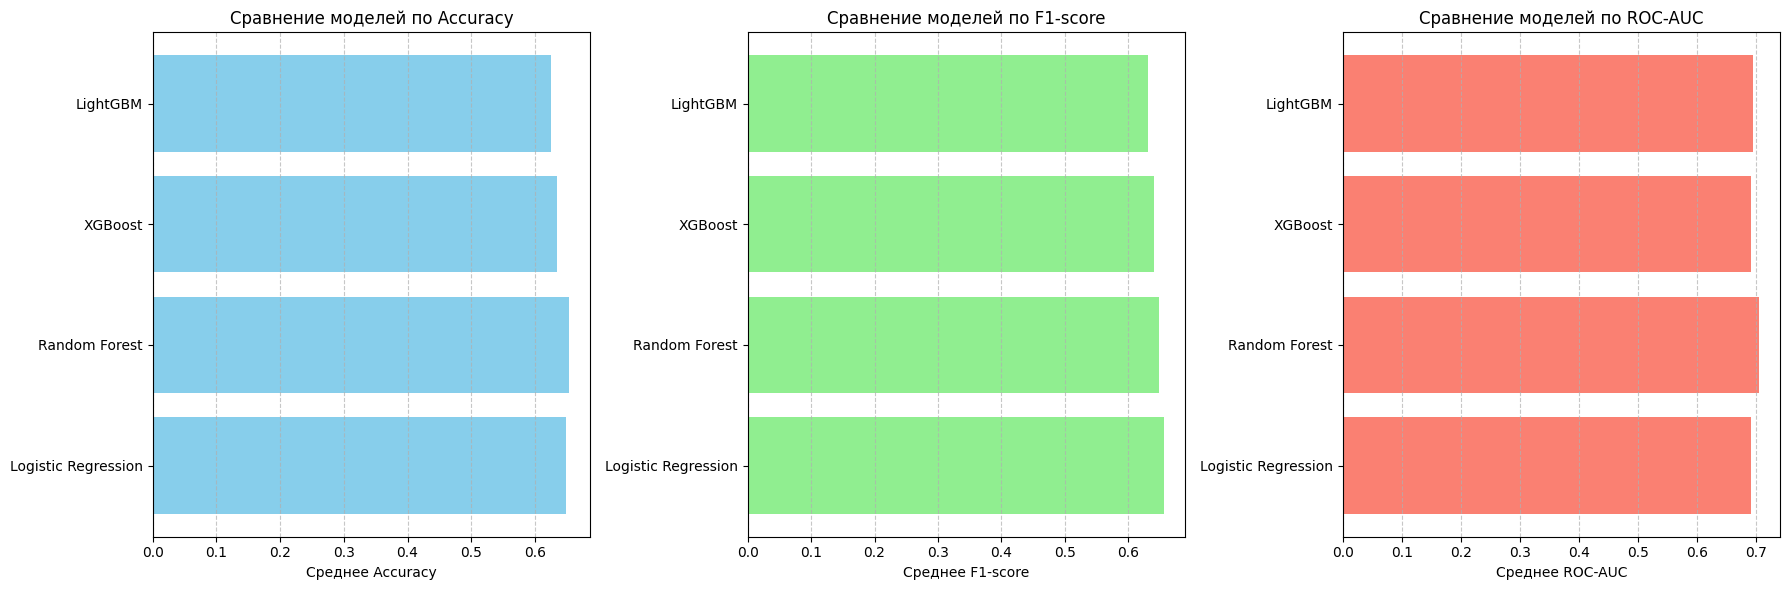

In [ ]:
accuracy_means = [res['accuracy_mean'] for res in results]
f1_means = [res['f1_mean'] for res in results]
roc_auc_means = [res['rocauc_mean'] for res in results]
names = [res['name'] for res in results]

plt.figure(figsize=(18, 6))

# Accuracy
plt.subplot(1, 3, 1)
plt.barh(names, accuracy_means, color='skyblue')
plt.title('Сравнение моделей по Accuracy')
plt.xlabel('Среднее Accuracy')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# F1-score
plt.subplot(1, 3, 2)
plt.barh(names, f1_means, color='lightgreen')
plt.title('Сравнение моделей по F1-score')
plt.xlabel('Среднее F1-score')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# ROC-AUC
plt.subplot(1, 3, 3)
plt.barh(names, roc_auc_means, color='salmon')
plt.title('Сравнение моделей по ROC-AUC')
plt.xlabel('Среднее ROC-AUC')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# Подбор гиперпараметров для случайного леса

param_grid_rf = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [3, 10, None],
    'model__min_samples_split': [2, 5]
}

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=3, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Лучшие гиперпараметры:", grid_rf.best_params_)
print("Лучший ROC-AUC:", grid_rf.best_score_)

Лучшие гиперпараметры: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 50}
Лучший ROC-AUC: 0.7220251459362371


In [ ]:
# Подбор гиперпараметров для Логистической регрессии
param_grid_lr = {
    'model__C': [ 0.01, 0.1, 1, 10],
    'model__penalty': ['l1', 'l2'],
}

pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42, max_iter=1000))
])

grid_lr = GridSearchCV(
    pipeline_lr,
    param_grid_lr,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)

grid_lr.fit(X_train, y_train)

print("Лучшие гиперпараметры:", grid_lr.best_params_)
print("Лучший ROC-AUC:", grid_lr.best_score_)

Лучшие гиперпараметры: {'model__C': 1, 'model__penalty': 'l2'}
Лучший ROC-AUC: 0.690653844234895


In [ ]:
# Подбор гиперпараметров для XGBoost
param_grid_xgb = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [3, 5, 10],
    'model__learning_rate': [0.01, 0.1]
}

pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(random_state=42))
])

grid_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=3, scoring='roc_auc', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

print("Лучшие гиперпараметры:", grid_xgb.best_params_)
print("Лучший ROC-AUC:", grid_xgb.best_score_)

Лучшие гиперпараметры: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100}
Лучший ROC-AUC: 0.6988336881260845


Модель случайного леса с подобранными парамаетрами показала лучший результат

In [ ]:
# лучшая модель случайного леса
best_model = grid_rf.best_estimator_

# Предсказания на тестовых данных
y_pred = best_model.predict(X_test)
# Вероятности для ROC-AUC
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Оценка качества
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Оценки метрик на тестовых данных:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Оценки метрик на тестовых данных:
Accuracy: 0.6716
F1: 0.6374
ROC-AUC: 0.7362


Text(45.72222222222221, 0.5, 'Истинный класс')

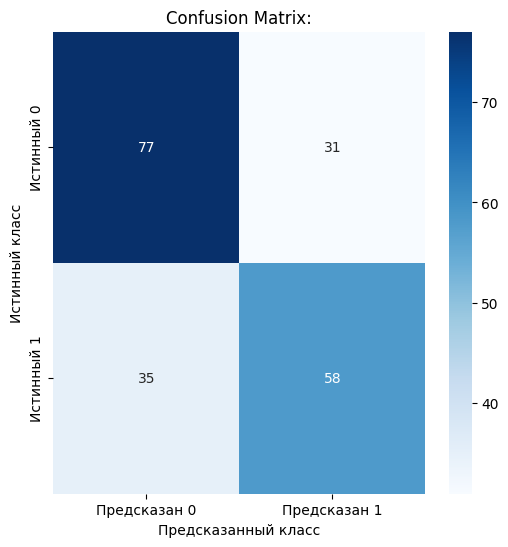

In [ ]:
# confusion matrix
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Предсказан 0', 'Предсказан 1'],
            yticklabels=['Истинный 0', 'Истинный 1'])
plt.title(f'Confusion Matrix:')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')

In [ ]:
print(classification_report(y_test, y_pred, target_names=['SI ≤ медианы', 'SI > медианы'], digits=3))

              precision    recall  f1-score   support

SI ≤ медианы      0.688     0.713     0.700       108
SI > медианы      0.652     0.624     0.637        93

    accuracy                          0.672       201
   macro avg      0.670     0.668     0.669       201
weighted avg      0.671     0.672     0.671       201



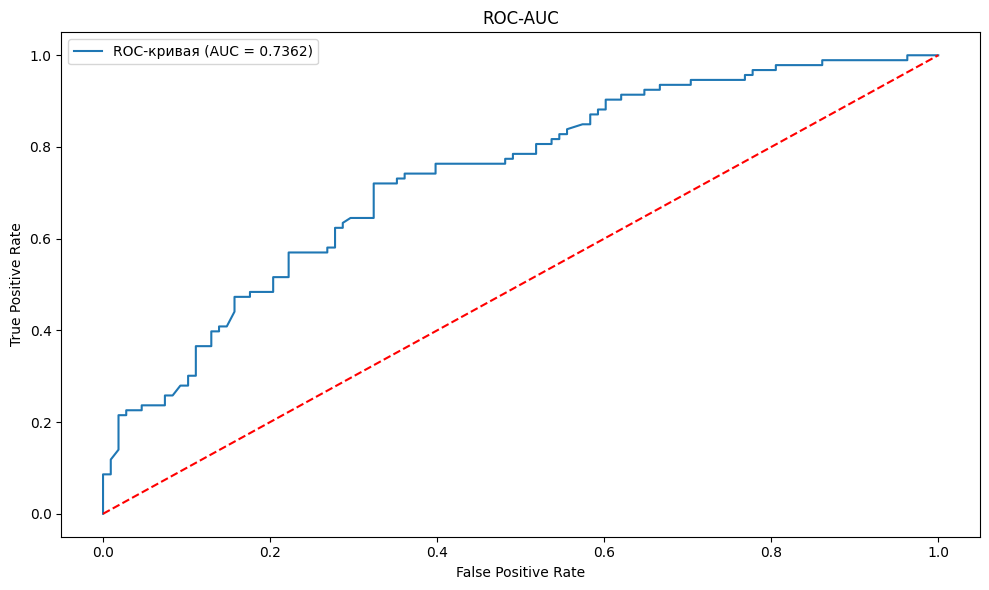

In [ ]:
# график ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC-кривая (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], '--r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC')
plt.legend()
plt.tight_layout()

               feature  importance
24        BCUT2D_MRLOW    0.021587
18        BCUT2D_MWLOW    0.020778
96         VSA_EState4    0.018608
21       BCUT2D_LOGPHI    0.017021
3       MinEStateIndex    0.016500
20        BCUT2D_CHGLO    0.015984
67            SMR_VSA7    0.015574
0    MaxAbsEStateIndex    0.015258
100        VSA_EState8    0.014732
1       MaxEStateIndex    0.014209


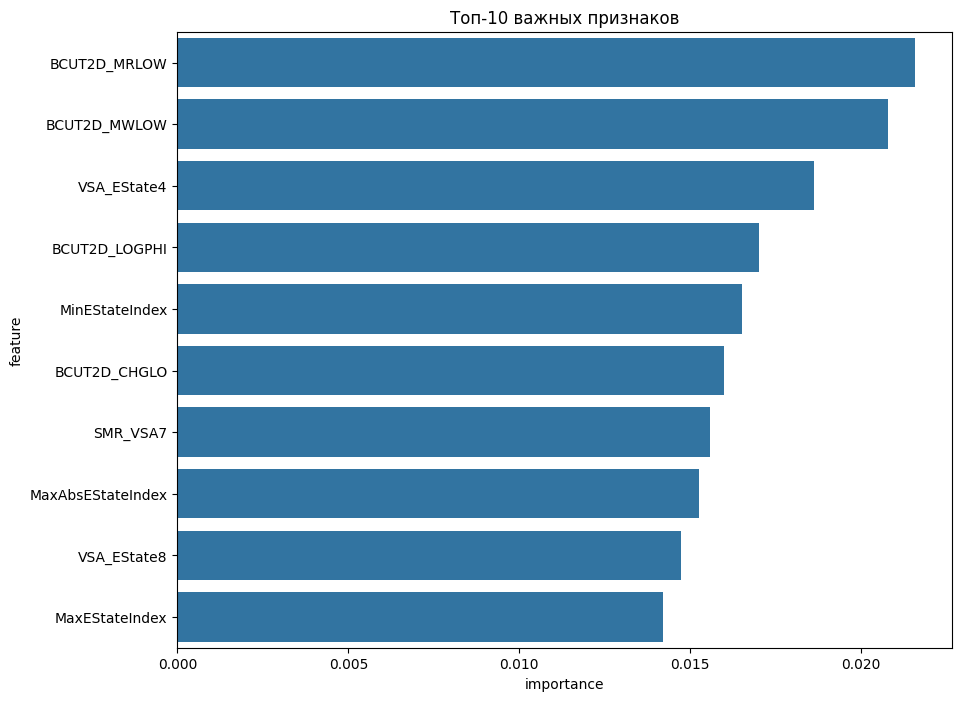

In [ ]:
# Важность признаков лучшей модели
feature_importance = best_model.named_steps['model'].feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print(feature_importance_df[:10])
# Топ 10 важных признаков
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title('Топ-10 важных признаков')
plt.show()

## Выводы

Наилучшая модель - случайный лес с параметрами
- max_depth: 10,
- min_samples_split: 5,
- n_estimators: 50

Оценки метрик на тестовых данных:    
Accuracy: 0.6716  
F1: 0.6374  
ROC-AUC: 0.7362  

Модель показала неплохую (умеренную) способность различать классы

Наиболее важные признаки для решения задачи классификации SI:   
- BCUT2D_MRLOW
- BCUT2D_MWLOW  
- VSA_EState4
- BCUT2D_LOGPHI
- MinEStateIndex  

Рекоммендаци по улучшению:
- Провести более глубокий EDA
- Применение методов для уменьшения размерности
- применить Feature Engineering для создания новых признаков